# Box Office Mojo

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Function to read filepath as well as clean the file

def cleaning(file):
#     read Box Office Mojo csv
    df = pd.read_csv(file)
#     Changing data type of foreign_gross to numeric
    df["foreign_gross"] =(
        df["foreign_gross"]
        .str.replace(",", "")
        .astype(float)
    )
#     removing outliers from domestic_gross
    dom_low, dom_high = df["domestic_gross"].quantile([0.3,0.7])
    dom_outliers = df["domestic_gross"].between(dom_low, dom_high)
    
# #     removing outliers from domestic_gross
    foreign_low, foreign_high = df["foreign_gross"].quantile([0.3,0.7])
    foreign_outliers = df["foreign_gross"].between(foreign_low, foreign_high)
    
# # #     Put everything together
    df = (df[dom_outliers])
    df = (df.loc[foreign_outliers])

#   the function, return clean data 
    return df;

In [6]:
# Read file through funtion
bom = cleaning("data/bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
96,The Ghost Writer,Sum.,15500000.0,44700000.0,2010
110,Heartbreaker,IFC,504000.0,46900000.0,2010
114,The Girl Who Kicked the Hornet's Nest,MBox,5200000.0,38300000.0,2010
115,The Man From Nowhere,CJ,528000.0,42500000.0,2010
117,My Name is Khan,FoxS,4000000.0,38300000.0,2010


In [7]:
bom.info()
# from this, we can see that the dtype of foreign_gross is an object
# we can also see a lot of null values from foreign gross

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 96 to 3242
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           349 non-null    object 
 1   studio          349 non-null    object 
 2   domestic_gross  349 non-null    float64
 3   foreign_gross   349 non-null    float64
 4   year            349 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 16.4+ KB


In [8]:
# let's look at the nature of the column "foreign_gross"
bom["foreign_gross"].round(1)

96      44700000.0
110     46900000.0
114     38300000.0
115     42500000.0
117     38300000.0
           ...    
3233     5400000.0
3234     6600000.0
3235     8000000.0
3236     5400000.0
3242     6200000.0
Name: foreign_gross, Length: 349, dtype: float64

In [9]:
# Have a look at the top 5 records in the file
bom.head()

,title,studio,domestic_gross,foreign_gross,year
96,The Ghost Writer,Sum.,15500000.0,44700000.0,2010
110,Heartbreaker,IFC,504000.0,46900000.0,2010
114,The Girl Who Kicked the Hornet's Nest,MBox,5200000.0,38300000.0,2010
115,The Man From Nowhere,CJ,528000.0,42500000.0,2010
117,My Name is Khan,FoxS,4000000.0,38300000.0,2010


In [10]:
bom["studio"].nunique()

78

In [11]:
bom["year"].value_counts()

2011    51
2010    44
2014    42
2012    40
2013    38
2016    37
2015    35
2018    33
2017    29
Name: year, dtype: int64

### Note

When you get here go back to the "cleaning" function and comment out the these 3 cleaning sections first:

removing outliers from domestic_gross
    dom_low, dom_high = df["domestic_gross"].quantile([0.3,0.7])
    dom_outliers = df["domestic_gross"].between(dom_low, dom_high)
    
    ,
    
removing outliers from domestic_gross
    foreign_low, foreign_high = df["foreign_gross"].quantile([0.3,0.7])
    foreign_outliers = df["foreign_gross"].between(foreign_low, foreign_high)
    
    and
  
 Put everything together
    df = (df[dom_outliers])
    df = (df.loc[foreign_outliers])
    
Then uncommect them to see the difference.
    

In [12]:
bom[["foreign_gross", "domestic_gross"]].describe().round(1)
# clearly we can conclude that there are outliers here.

,foreign_gross,domestic_gross
count,349.0,349.0
mean,18112320.9,6097965.6
std,12663423.3,5593751.3
min,5300000.0,195000.0
25%,8500000.0,1100000.0
50%,13600000.0,3900000.0
75%,23200000.0,10700000.0
max,56100000.0,17700000.0


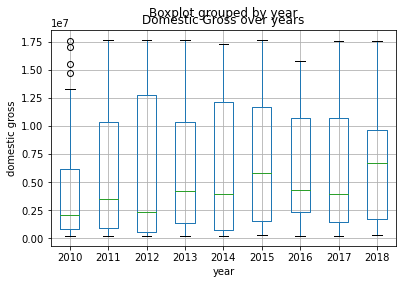

In [13]:
# visually finding outliers in the domestic_gross
ax = bom.boxplot(column="domestic_gross", by="year")
ax.set_ylabel("domestic gross")
ax.set_title("Domestic Gross over years");

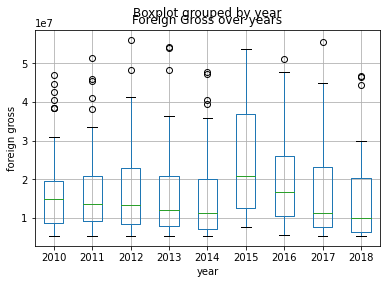

In [14]:
# visually finding outliers in the foreign_gross
ax = bom.boxplot(column="foreign_gross", by="year")
ax.set_ylabel("foreign gross")
ax.set_title("Foreign Gross over years");
# There are not so many outliers here compared to domestic_gross

In [15]:
# Which studio has the highest domestic_gross
mean_dom_gross_by_stu = (
    bom
    .groupby("studio")["domestic_gross"]
    .mean()
    .sort_values()
)
# for large number compression, we round the large numbers to 1dp
mean_dom_gross_by_stu = mean_dom_gross_by_stu.round(1)
mean_dom_gross_by_stu.dropna()

studio
Vari.       206000.0
MPI         206000.0
FR          211000.0
PalUni      256000.0
CL          287000.0
             ...    
W/Dim.    12319250.0
ORF       13050000.0
ParV      13300000.0
FD        13975000.0
Affirm    17600000.0
Name: domestic_gross, Length: 78, dtype: float64

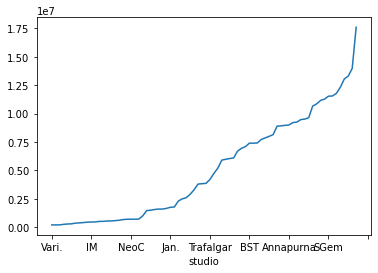

In [16]:
# visualize our above findings
mean_dom_gross_by_stu.plot();

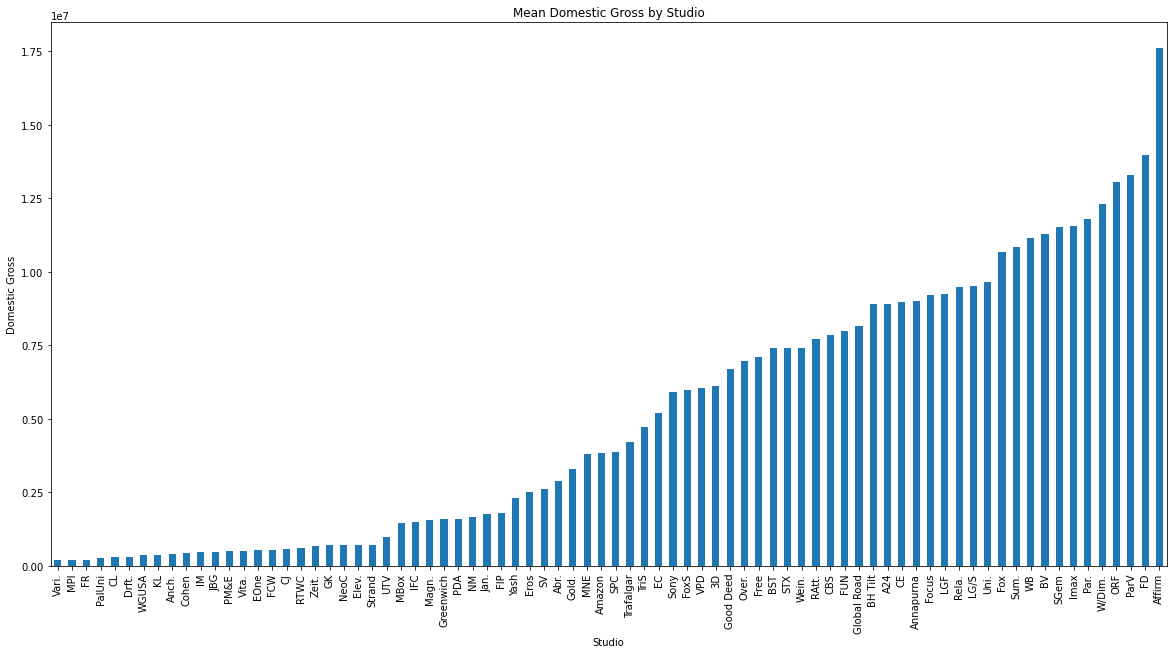

In [17]:
plt.figure(figsize=(20, 10))
mean_dom_gross_by_stu.plot(
    kind = "bar",
    xlabel = "Studio",
    ylabel = "Domestic Gross",
    title = "Mean Domestic Gross by Studio"
);

In [18]:
# Which studio has the highest domestic_gross

mean_foreign_gross_by_stu = (
    bom
    .groupby("studio")["foreign_gross"]
    .mean()
    .sort_values()
)
mean_foreign_gross_by_stu = (mean_foreign_gross_by_stu.round(1))
mean_foreign_gross_by_stu.dropna()

studio
Vita.       5300000.0
Affirm      5500000.0
EC          5900000.0
BH Tilt     6300000.0
PDA         6600000.0
              ...    
SV         47800000.0
MPI        48300000.0
IM         51300000.0
FUN        53800000.0
PM&E       54100000.0
Name: foreign_gross, Length: 78, dtype: float64

In [19]:
mean_foreign_gross_by_stu.describe().round(1)

count          78.0
mean     18454362.9
std      12321585.9
min       5300000.0
25%      10100000.0
50%      13739583.4
75%      22739062.5
max      54100000.0
Name: foreign_gross, dtype: float64

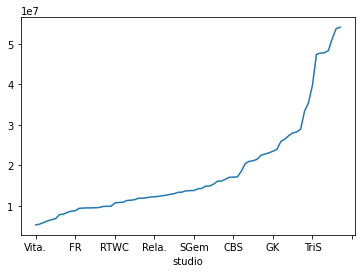

In [20]:
# visualize our above findings
mean_foreign_gross_by_stu.plot();

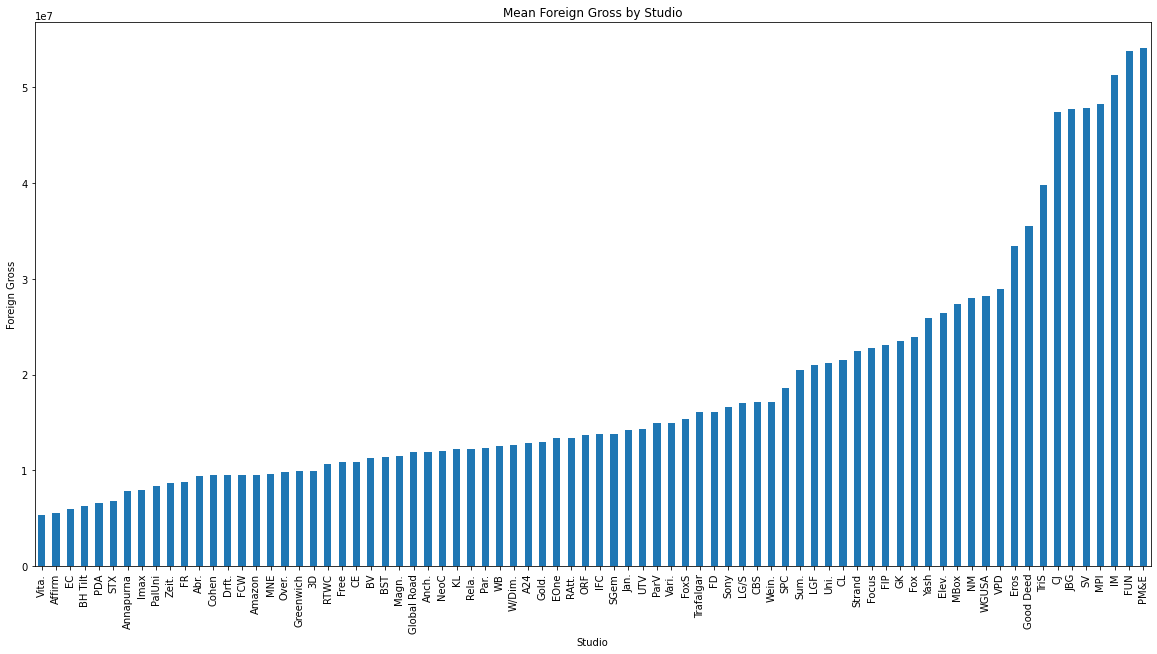

In [21]:
plt.figure(figsize=(20, 10))
mean_foreign_gross_by_stu.plot(
    kind = "bar",
    xlabel = "Studio",
    ylabel = "Foreign Gross",
    title = "Mean Foreign Gross by Studio"
);

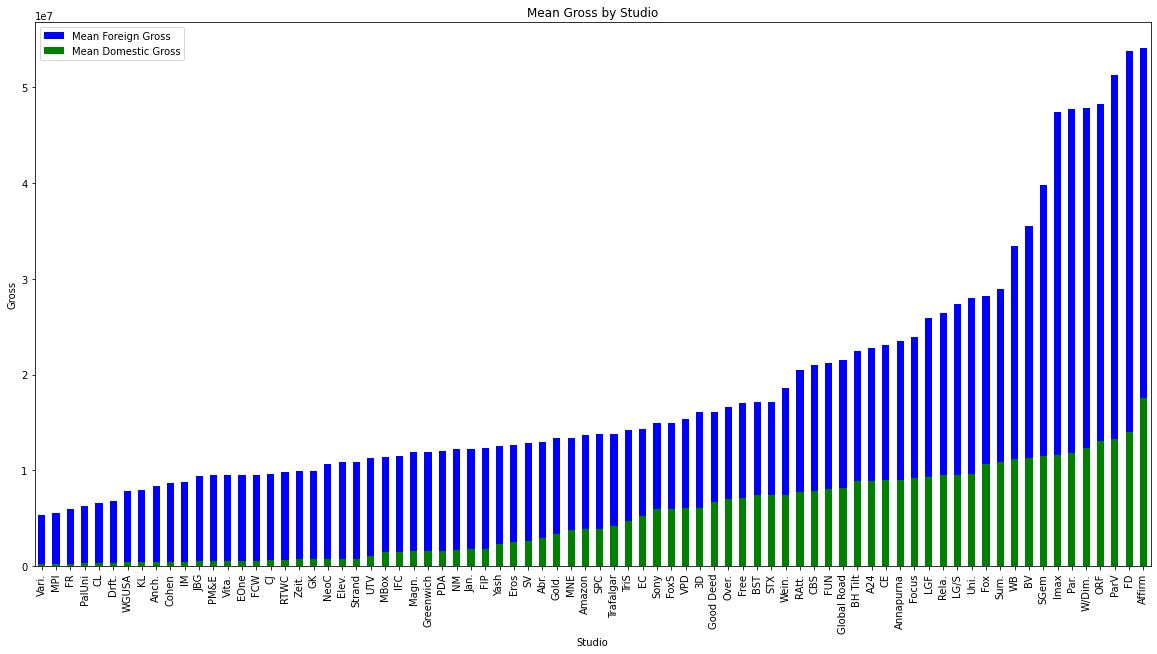

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the mean foreign gross (in blue)
mean_foreign_gross_by_stu.plot(kind="bar", color="blue", label="Mean Foreign Gross", ax=ax)

# Plot the mean domestic gross (in orange)
mean_dom_gross_by_stu.plot(kind="bar", color="g", label="Mean Domestic Gross", ax=ax)

# Customize the plot
ax.set_xlabel("Studio")
ax.set_ylabel("Gross")
ax.set_title("Mean Gross by Studio")
ax.legend()

# Show the plot
plt.show();

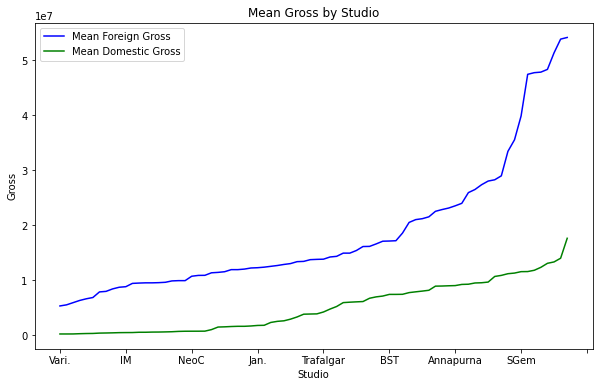

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean foreign gross (in blue)
mean_foreign_gross_by_stu.plot(label="Mean Foreign Gross", color="blue")

# Plot the mean domestic gross (in orange)
mean_dom_gross_by_stu.plot(label="Mean Domestic Gross", color="g")

# Customize the plot
ax.set_xlabel("Studio")
ax.set_ylabel("Gross")
ax.set_title("Mean Gross by Studio")
ax.legend()

# Show the plot
plt.show();

In [24]:
# Does domestic gross affect foreign gross?

bom["foreign_gross"].corr(bom["domestic_gross"])

-0.01509821990448702

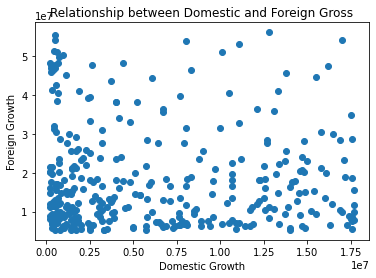

In [25]:
# Let's see this visually

plt.scatter(bom["domestic_gross"], bom["foreign_gross"])
plt.xlabel("Domestic Growth")
plt.ylabel("Foreign Growth")
plt.title("Relationship between Domestic and Foreign Gross");

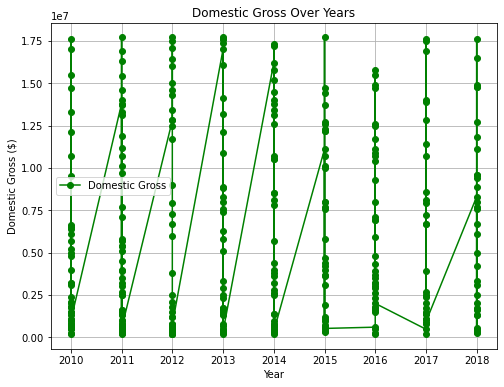

In [26]:
# Create a linear plot
plt.figure(figsize=(8, 6))
plt.plot(bom["year"], bom["domestic_gross"], marker='o', color='g', label="Domestic Gross")
plt.xlabel("Year")
plt.ylabel("Domestic Gross ($)")
plt.title("Domestic Gross Over Years")
plt.grid(True)
plt.legend()
plt.show();

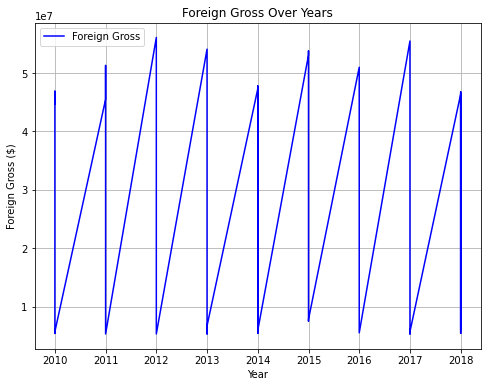

In [27]:
# Create a linear plot
plt.figure(figsize=(8, 6))
plt.plot(bom["year"], bom["foreign_gross"], color='b', label="Foreign Gross")
plt.xlabel("Year")
plt.ylabel("Foreign Gross ($)")
plt.title("Foreign Gross Over Years")
plt.grid(True)
plt.legend()
plt.show();

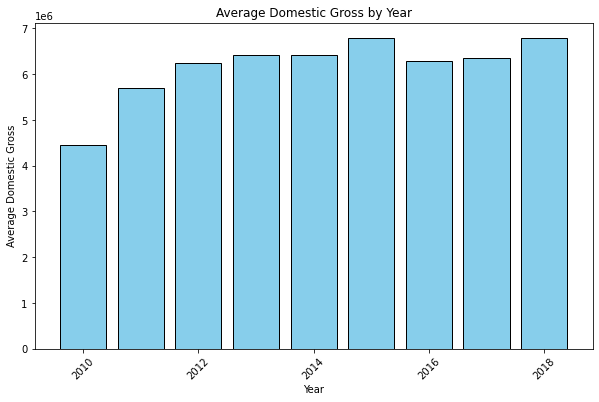

In [28]:
average_domestic_gross = bom.groupby('year')['domestic_gross'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_domestic_gross.index, average_domestic_gross.values, color='skyblue', edgecolor='black')
plt.title('Average Domestic Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show();

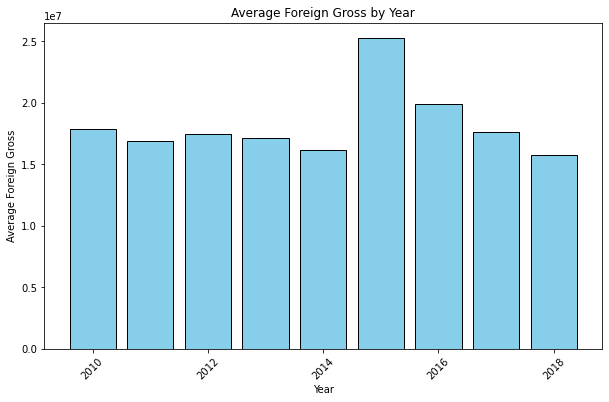

In [29]:
average_domestic_gross = bom.groupby('year')['foreign_gross'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_domestic_gross.index, average_domestic_gross.values, color='skyblue', edgecolor='black')
plt.title('Average Foreign Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Foreign Gross')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show();

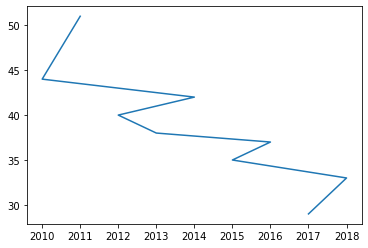

In [62]:
bom["year"].value_counts().plot();

# The Numbers

In [30]:
# Function to read The Numbers filepath as well as clean the file

def cleaning_2(file):
#     read The Numbers csv
    df = pd.read_csv(file)
    
# For easy calculations, we change "production_budget", "domestic_gross", and "worldwide_gross" data type to floats
# Production_budget
    df["production_budget"] = (
        df["production_budget"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
# Domestic_gross
    df["domestic_gross"] = (
        df["domestic_gross"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
# Worldwid_gross
    df["worldwide_gross"] = (
        df["worldwide_gross"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
    
# Change date from obj to date
    df["release_date"] = pd.to_datetime(df["release_date"])
    
# Remove outliers from worldwide gross
    w_low, w_high = df["worldwide_gross"].quantile([0.3,0.7])
    w_outliers = df["worldwide_gross"].between(w_low, w_high)
    
# Remove outliers from prodution budget
    p_low, p_high = df["production_budget"].quantile([0.3,0.7])
    p_outliers = df["production_budget"].between(p_low, p_high)
    
# Remove outliers from domestic gross
    d_low, d_high = df["domestic_gross"].quantile([0.3,0.7])
    d_outliers = df["domestic_gross"].between(d_low, d_high)
    
# Put everything together
#     df = (df[d_outliers])
#     df = (df.loc[p_outliers])
#     df = (df.loc[w_outliers])

#   the function, return clean data 
    return df;

In [31]:
tn = cleaning_2("data/tn.movie_budgets.csv")
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Note

In [32]:
# before cleaning the dataset,We notice that: 
# no null values here (This is good),
# we have 6 columns and 5782 records.
# 5 of these columns are objects while only id is an integer
# date is also in object form

tn.info()

# after cleaning the dataset,We notice that: 
# again, no null values here (This is good),
# we still have 6 columns and 5782 records.
# 3 of the columns("production_budget", domestic_gross, worldwide_gross) are floats
# and date is in date type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [33]:
# Let's add profit columns to understand the profits and loses of the business
tn["domestic_profits"] = tn["domestic_gross"] - tn["production_budget"]
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0


In [34]:
tn["worldwide_profits"] = tn["worldwide_gross"] - tn["production_budget"]
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08


In [35]:
tn["year"] = tn["release_date"].dt.year
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08,2017


In [36]:
tn[["production_budget", "domestic_gross", "worldwide_gross", "domestic_profits", "worldwide_profits"]].describe().round(1)

,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
count,5782.0,5782.0,5.782000e+03,5782.0,5.782000e+03
mean,31587757.1,41873326.9,9.148746e+07,10285569.8,5.989970e+07
std,41812076.8,68240597.4,1.747200e+08,49921366.5,1.460889e+08
min,1100.0,0.0,0.000000e+00,-307237650.0,-2.002376e+08
25%,5000000.0,1429534.5,4.125415e+06,-9132757.0,-2.189071e+06
50%,17000000.0,17225945.0,2.798445e+07,-348775.5,8.550286e+06
75%,40000000.0,52348661.5,9.764584e+07,17781444.0,6.096850e+07
max,425000000.0,936662225.0,2.776345e+09,630662225.0,2.351345e+09


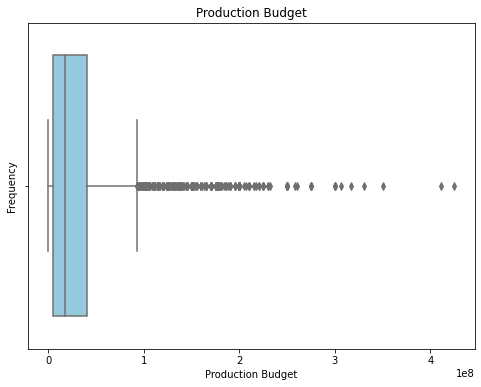

In [37]:
# production budget boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=tn['production_budget'], color='skyblue')
plt.title('Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.show();

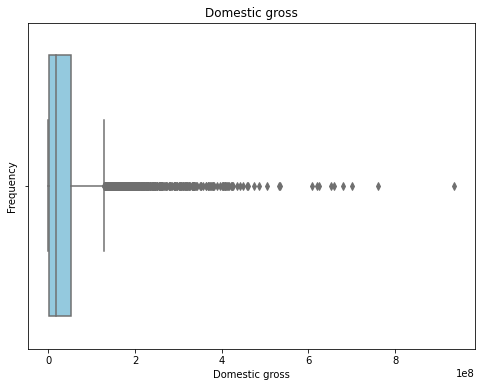

In [38]:
# Domestic gross boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=tn['domestic_gross'], color='skyblue')
plt.title('Domestic gross')
plt.xlabel('Domestic gross')
plt.ylabel('Frequency')
plt.show();

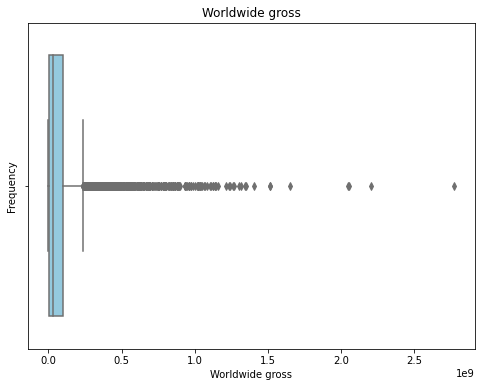

In [39]:
# worldwide gross boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=tn['worldwide_gross'], color='skyblue')
plt.title('Worldwide gross')
plt.xlabel('Worldwide gross')
plt.ylabel('Frequency')
plt.show();

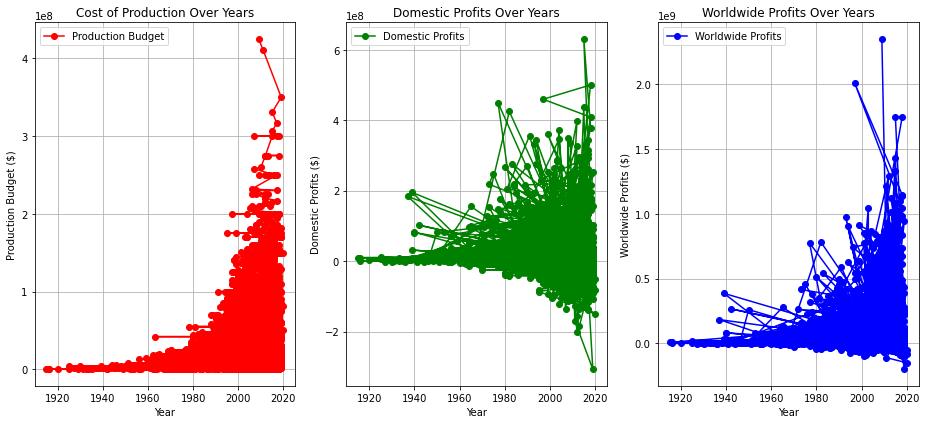

In [40]:
fig, (ax2, ax3, ax1) = plt.subplots(1, 3, figsize=(13, 6))

# Plot Production Budget
ax2.plot(tn["year"], tn["production_budget"], marker='o', color='r', label="Production Budget")
ax2.set_xlabel("Year")
ax2.set_ylabel("Production Budget ($)")
ax2.set_title("Cost of Production Over Years")
ax2.grid(True)
ax2.legend()

# Plot Worldwide Profits
ax1.plot(tn["year"], tn["worldwide_profits"], marker='o', color='b', label="Worldwide Profits")
ax1.set_xlabel("Year")
ax1.set_ylabel("Worldwide Profits ($)")
ax1.set_title("Worldwide Profits Over Years")
ax1.grid(True)
ax1.legend()

# Plot Domestic Profits
ax3.plot(tn["year"], tn["domestic_profits"], marker='o', color='g', label="Domestic Profits")
ax3.set_xlabel("Year")
ax3.set_ylabel("Domestic Profits ($)")
ax3.set_title("Domestic Profits Over Years")
ax3.grid(True)
ax3.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show();

In [41]:
tn["production_budget"].corr(tn["domestic_profits"])

0.09974209165512304

# The Movie DB

In [42]:
def cleaning_3(file):
    
# read the moviedb csv
    df = pd.read_csv(file)

# changing "release_date" from obj to datetime type
    df["release_date"] = pd.to_datetime(df["release_date"])
    
# removing outliers from the numerical features
# popularity
    pl, ph = df["popularity"].quantile([0.05, 0.65])
    p_out = df["popularity"].between(pl, ph)
    
# average vote
    a_low, a_high = df["vote_average"].quantile([0.3, 0.8])
    a_outlier = df["vote_average"].between(a_low, a_high)
    
# vote count
    v_low, v_high = df["vote_count"].quantile([0.005, 0.65])
    v_outlier = df["vote_count"].between(v_low, v_high)

# put them together
    df = df[p_out]
    df = (df.loc[a_outlier])
    df = (df.loc[v_outlier])
    
# return the cleaned dataset
    return df

In [43]:
tmdb = cleaning_3("data/tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
784,784,"[28, 12, 18, 53]",32005,en,Breaking Point,2.225,2009-12-04,Breaking Point,5.6,8
785,785,[35],45920,en,Ollie Klublershturf vs. the Nazis,2.222,2010-09-14,Ollie Klublershturf vs. the Nazis,5.9,7
789,789,"[10752, 18]",57602,fr,Un homme qui crie,2.211,2010-09-28,A Screaming Man,6.1,10
794,794,[35],63160,en,Successful Alcoholics,2.203,2010-01-22,Successful Alcoholics,6.1,7
795,795,[99],62325,en,Bhutto,2.198,2010-12-03,Bhutto,5.4,6


In [44]:
# before cleaning, the dataset contains:
# 26517 records and 10 feature(3 integers, 5 objects, and 2 floating values)
# no null value(this is good),
# release_date is an object

tmdb.info()
# after cleaning, the dataset contains:
# release_date is in datetime data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6424 entries, 784 to 26438
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         6424 non-null   int64         
 1   genre_ids          6424 non-null   object        
 2   id                 6424 non-null   int64         
 3   original_language  6424 non-null   object        
 4   original_title     6424 non-null   object        
 5   popularity         6424 non-null   float64       
 6   release_date       6424 non-null   datetime64[ns]
 7   title              6424 non-null   object        
 8   vote_average       6424 non-null   float64       
 9   vote_count         6424 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 552.1+ KB


In [45]:
tmdb[["popularity", "vote_average", "vote_count"]].describe()

,popularity,vote_average,vote_count
count,6424.000000,6424.000000,6424.000000
mean,0.956754,6.283188,3.835928
std,0.451099,0.595280,3.148488
min,0.600000,5.200000,1.000000
25%,0.600000,6.000000,1.000000
50%,0.711000,6.200000,3.000000
75%,1.257000,7.000000,5.000000
max,2.235000,7.300000,13.000000


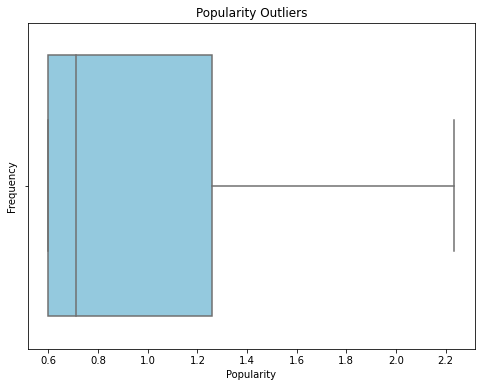

In [46]:
# box plot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb['popularity'], color='skyblue')
plt.title('Popularity Outliers')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show();

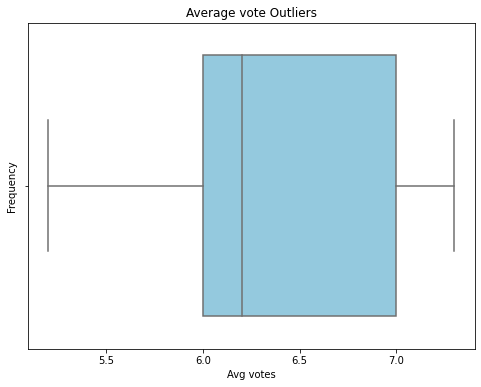

In [47]:
# box plot for average votes
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb['vote_average'], color='skyblue')
plt.title('Average vote Outliers')
plt.xlabel('Avg votes')
plt.ylabel('Frequency')
plt.show();

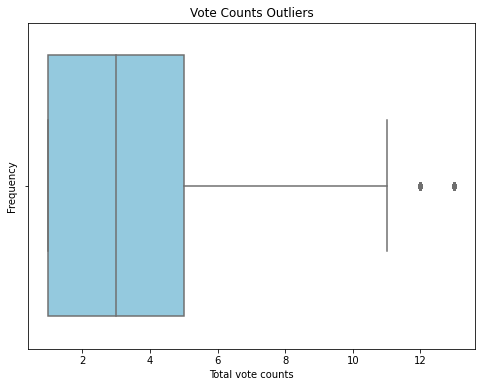

In [48]:
# box plot for vote counts
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb['vote_count'], color='skyblue')
plt.title('Vote Counts Outliers')
plt.xlabel('Total vote counts')
plt.ylabel('Frequency')
plt.show();

In [49]:
# lets check how many movies per original language
tmdb["original_language"].value_counts()

en    5677
es     131
fr      85
ru      70
de      62
ja      48
zh      33
it      32
hi      21
ko      18
pt      17
th      16
pl      16
da      14
cn      13
he      13
xx      13
nl      11
no      11
te      10
sv       9
ar       8
tl       8
fa       8
fi       7
el       7
hu       7
ro       5
bn       4
cs       3
ab       3
mr       3
lv       3
vi       3
lo       2
hr       2
id       2
is       2
ur       2
pa       2
sr       2
kn       2
lt       2
bg       2
sn       2
et       1
ps       1
cr       1
ta       1
tr       1
uk       1
ml       1
eu       1
gu       1
ha       1
bs       1
ka       1
sq       1
Name: original_language, dtype: int64

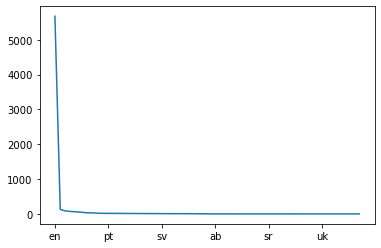

In [50]:
# lets visualize this
tmdb["original_language"].value_counts().plot();
# We can conclude that English language contains the highest number of movies

In [51]:
# add a column "year" from release_date
tmdb["year"] = tmdb["release_date"].dt.year
tmdb["year"].value_counts()

2013    809
2016    780
2015    772
2017    766
2014    764
2012    699
2011    694
2010    688
2018    407
2009     11
2006      5
2008      5
1981      3
2005      2
2004      2
2007      2
1987      2
1983      2
1999      1
1965      1
1961      1
1970      1
1986      1
1998      1
1939      1
1992      1
1988      1
1984      1
1980      1
Name: year, dtype: int64

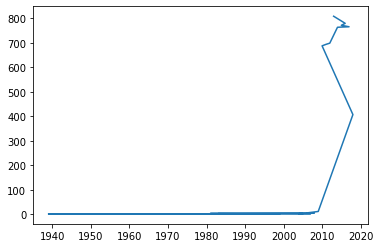

In [52]:
# let's visualize how many movies were released each year
tmdb["year"].value_counts().plot();
# We conclude that tmdb movie production rate grow by time 

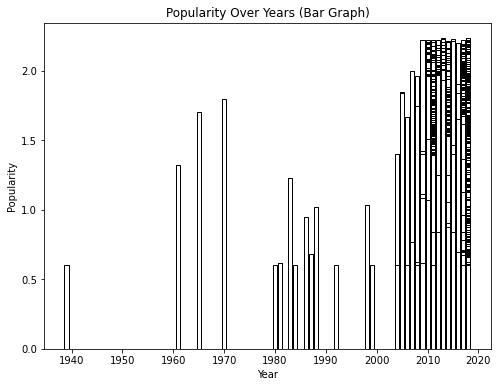

In [53]:
plt.figure(figsize=(8, 6))
plt.bar(tmdb['year'], tmdb['popularity'], color='w', edgecolor="black", alpha=1)
plt.title('Popularity Over Years (Bar Graph)')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show();

# The movieDB is progressively gaining popuarity every year

In [54]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
784,784,"[28, 12, 18, 53]",32005,en,Breaking Point,2.225,2009-12-04,Breaking Point,5.6,8,2009
785,785,[35],45920,en,Ollie Klublershturf vs. the Nazis,2.222,2010-09-14,Ollie Klublershturf vs. the Nazis,5.9,7,2010
789,789,"[10752, 18]",57602,fr,Un homme qui crie,2.211,2010-09-28,A Screaming Man,6.1,10,2010
794,794,[35],63160,en,Successful Alcoholics,2.203,2010-01-22,Successful Alcoholics,6.1,7,2010
795,795,[99],62325,en,Bhutto,2.198,2010-12-03,Bhutto,5.4,6,2010


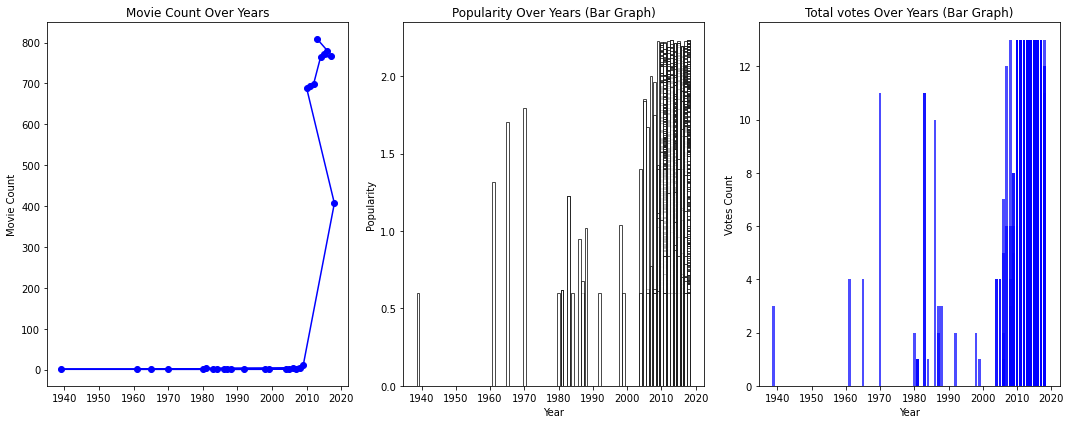

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Plot the line graph for the count of movies per year
tmdb["year"].value_counts().plot(kind='line', marker='o', linestyle='-', color='b', ax=ax1)
ax1.set_title('Movie Count Over Years')
ax1.set_ylabel('Movie Count')

# Plot the bar graph for popularity over years
ax2.bar(tmdb['year'], tmdb['popularity'], color='w', edgecolor="black", alpha=0.7)
ax2.set_title('Popularity Over Years (Bar Graph)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Popularity')

# Plot the bar graph for average votes over years
ax3.bar(tmdb['year'], tmdb['vote_count'], color='b', alpha=0.7)
ax3.set_title('Total votes Over Years (Bar Graph)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Votes Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show();

# So it possible to conclude that the movies are released in The MovieDB, the more popular The movieDB gets

In [56]:
tmdb["vote_count"].corr(tmdb["popularity"])

0.549394219698477

In [57]:
tmdb.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,year
count,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000
mean,12972.688979,304006.474626,0.956754,6.283188,3.835928,2013.756071
std,7530.094192,147683.206480,0.451099,0.595280,3.148488,3.129584
min,784.000000,7297.000000,0.600000,5.200000,1.000000,1939.000000
25%,6597.750000,178988.000000,0.600000,6.000000,1.000000,2012.000000
50%,12902.500000,320705.500000,0.711000,6.200000,3.000000,2014.000000
75%,19462.250000,423116.000000,1.257000,7.000000,5.000000,2016.000000
max,26438.000000,608079.000000,2.235000,7.300000,13.000000,2018.000000


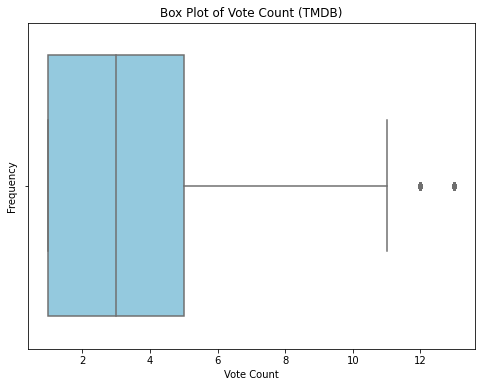

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb['vote_count'], color='skyblue')
plt.title('Box Plot of Vote Count (TMDB)')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show();